# **Theory**




### 1. What is unsupervised learning in the context of machine learning?

* It is a type of learning where data has **no labels/output**.
* The algorithm just tries to find **patterns or groups**.
* Example – grouping customers by shopping habits without knowing their category.

---

### 2. How does K-Means clustering algorithm work?

* First, choose the number of clusters (k).
* Select random k points as centers (centroids).
* Assign each data point to the nearest centroid.
* Recalculate the centroid (mean of all points in that cluster).
* Repeat until centroids stop changing.
* Example – group students based on marks & study hours.

---

### 3. Explain the concept of a dendrogram in hierarchical clustering.

* A dendrogram is a **tree diagram** that shows how clusters are merged step by step.
* The bottom shows individual points, and as we go up, points merge into clusters.
* Example – when clustering animals, “dog” and “wolf” may merge first, then later with “fox.”

---

### 4. What is the main difference between K-Means and Hierarchical Clustering?

* K-Means → needs us to tell the number of clusters (k).
* Hierarchical → no need to tell k at the start, it makes a tree of clusters.
* K-Means is good for large datasets, while hierarchical is better for small ones with visualization.

---

### 5. What are the advantages of DBSCAN over K-Means?

* Does not need number of clusters in advance.
* Can find clusters of any shape (not just round).
* Handles noise and outliers better.

---

### 6. When would you use Silhouette Score in clustering?

* When I want to check **how good the clustering is**.
* Value is between -1 and +1 → closer to 1 means better.
* Example – if clustering customers, I can use silhouette score to decide whether k=3 or k=4 is better.

---

### 7. What are the limitations of Hierarchical Clustering?

* Very slow for large datasets.
* Once clusters are merged/split, they cannot be undone.
* Sensitive to noisy data.

---

### 8. Why is feature scaling important in clustering algorithms like K-Means?

* Because distance is used to form clusters.
* If features are on different scales, larger values will dominate.
* Example – height in cm and income in dollars → income will dominate unless we scale.

---

### 9. How does DBSCAN identify noise points?

* If a point has fewer neighbors than **MinPts** within radius **ε**, it is treated as noise.
* Such points don’t belong to any cluster.

---

### 10. Define inertia in the context of K-Means.

* Inertia = sum of squared distances between data points and their cluster center.
* Lower inertia means better clustering (but too low may mean overfitting).

---

### 11. What is the elbow method in K-Means clustering?

* A method to find the best number of clusters.
* Plot inertia vs. number of clusters.
* The “elbow point” (where curve bends) is the best k.

---

### 12. Describe the concept of "density" in DBSCAN.

* Density = how many points are within a certain distance (ε) of a point.
* If points are close enough, they form a dense region → cluster.

---

### 13. Can hierarchical clustering be used on categorical data?

* Yes, but it is tricky.
* We need to use proper distance measures (like Hamming distance).
* Works better with numerical data.

---

### 14. What does a negative Silhouette Score indicate?

* It means points are assigned to the **wrong cluster**.
* The cluster separation is poor.

---

### 15. Explain the term "linkage criteria" in hierarchical clustering.

* It decides how distance between clusters is measured.
* Types:

  * Single linkage → min distance between points.
  * Complete linkage → max distance between points.
  * Average linkage → average distance.

---

### 16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?

* K-Means assumes clusters are round and similar in size.
* If clusters are uneven or of different density, it may merge or split wrongly.

---

### 17. What are the core parameters in DBSCAN, and how do they influence clustering?

* **ε (epsilon):** radius for neighborhood.
* **MinPts:** minimum number of points to form dense cluster.
* Bigger ε → larger clusters.
* Higher MinPts → stricter definition of cluster.

---

### 18. How does K-Means++ improve upon standard K-Means initialization?

* Instead of random centroids, it chooses smarter initial centroids.
* This avoids poor clustering and speeds up convergence.

---

### 19. What is agglomerative clustering?

* A type of hierarchical clustering (bottom-up approach).
* Start with each point as its own cluster.
* Merge closest clusters step by step until one big cluster remains.

---

### 20. What makes Silhouette Score a better metric than just inertia for model evaluation?

* Inertia only measures compactness inside clusters.
* Silhouette Score also checks how **separated** clusters are.
* So it balances both cohesion (within cluster) and separation (between clusters).

---



# **Practical**

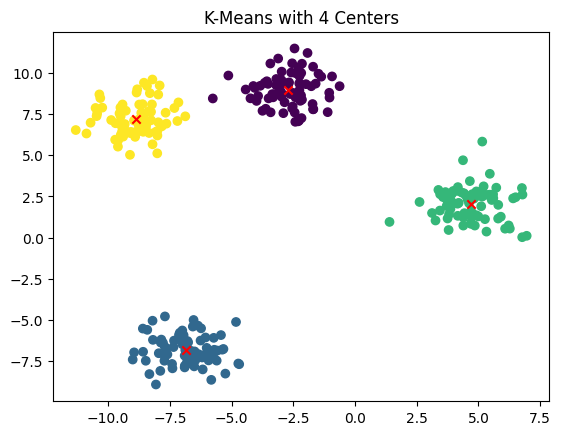

In [1]:
#21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using scatter plot.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="red", marker="x")
plt.title("K-Means with 4 Centers")
plt.show()


In [2]:
#22. Load the Iris dataset and use Agglomerative Clustering into 3 clusters. Display first 10 predicted labels.
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X = iris.data

agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X)

print("First 10 predicted labels:", labels[:10])


First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


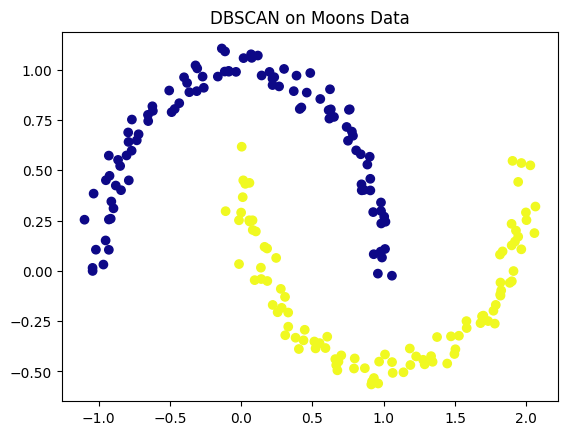

In [3]:
#23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers.
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=200, noise=0.05, random_state=42)

db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

plt.scatter(X[:,0], X[:,1], c=labels, cmap="plasma")
plt.title("DBSCAN on Moons Data")
plt.show()


In [4]:
#24. Load the Wine dataset and apply K-Means clustering after scaling. Print size of each cluster.
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

wine = load_wine()
X = StandardScaler().fit_transform(wine.data)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

unique, counts = np.unique(labels, return_counts=True)
print("Cluster sizes:", dict(zip(unique, counts)))


Cluster sizes: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


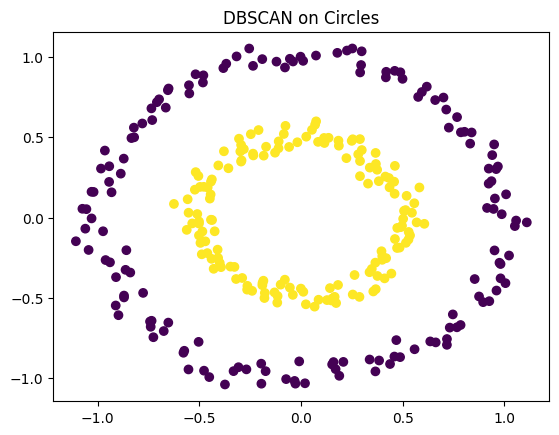

In [5]:
#25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot result.
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)

db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis")
plt.title("DBSCAN on Circles")
plt.show()


In [6]:
#26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Outputthe cluster centroid centroids.
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

data = load_breast_cancer()
X = MinMaxScaler().fit_transform(data.data)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

print("Cluster centroids:\n", kmeans.cluster_centers_)


Cluster centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


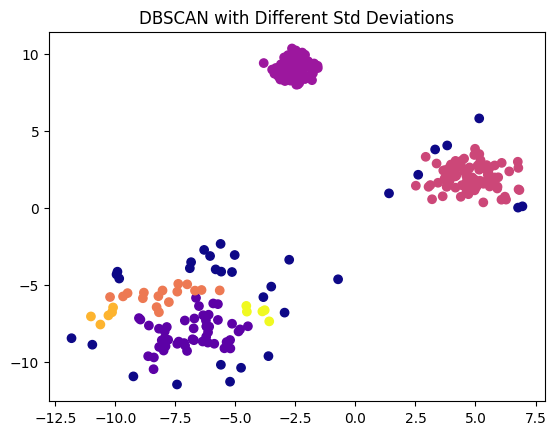

In [7]:
#27. Generate synthetic data using make_blobs with varying std dev and cluster with DBSCAN.
X, y = make_blobs(n_samples=300, centers=3, cluster_std=[0.5, 1.0, 2.0], random_state=42)

db = DBSCAN(eps=0.8, min_samples=5).fit(X)
labels = db.labels_

plt.scatter(X[:,0], X[:,1], c=labels, cmap="plasma")
plt.title("DBSCAN with Different Std Deviations")
plt.show()


In [ ]:
#28. Load the Digits dataset, reduce to 2D using PCA, and visualize clusters from K-Means.
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X = PCA(n_components=2).fit_transform(digits.data)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, cmap="tab10")
plt.title("K-Means on Digits (PCA reduced)")
plt.show()


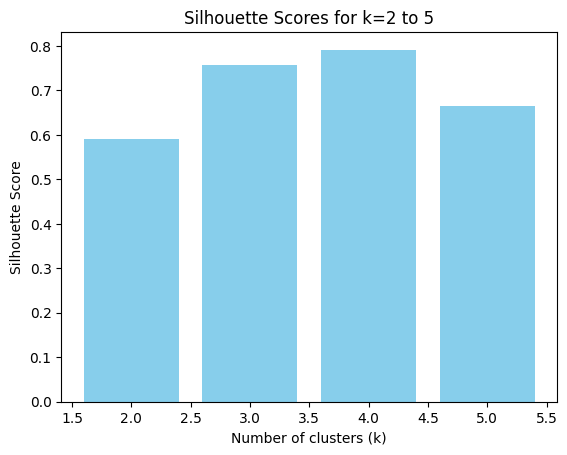

In [8]:
#29. Create synthetic data using make_blobs and evaluate silhouette scores for k=2 to 5. Display as bar chart.
from sklearn.metrics import silhouette_score
import numpy as np

X, y = make_blobs(n_samples=300, centers=4, random_state=42)

scores = []
for k in range(2, 6):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    labels = km.labels_
    scores.append(silhouette_score(X, labels))

plt.bar(range(2, 6), scores, color="skyblue")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for k=2 to 5")
plt.show()


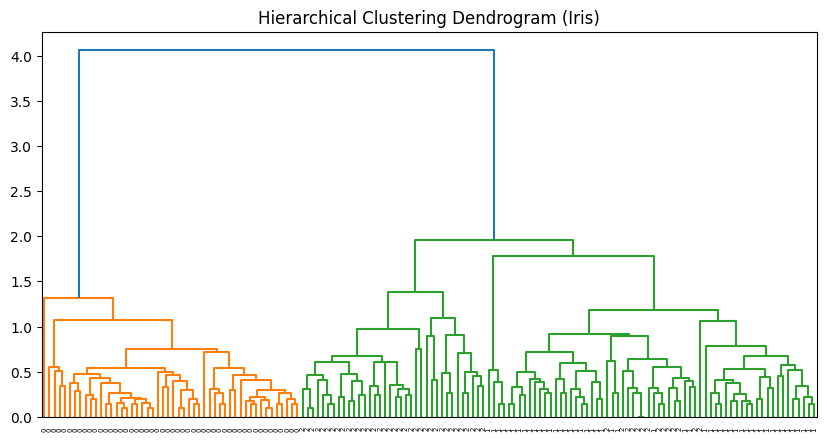

In [9]:
#30. Load the Iris dataset and use hierarchical clustering. Plot a dendrogram with average linkage.
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(iris.data, method="average")

plt.figure(figsize=(10, 5))
dendrogram(Z, labels=iris.target)
plt.title("Hierarchical Clustering Dendrogram (Iris)")
plt.show()


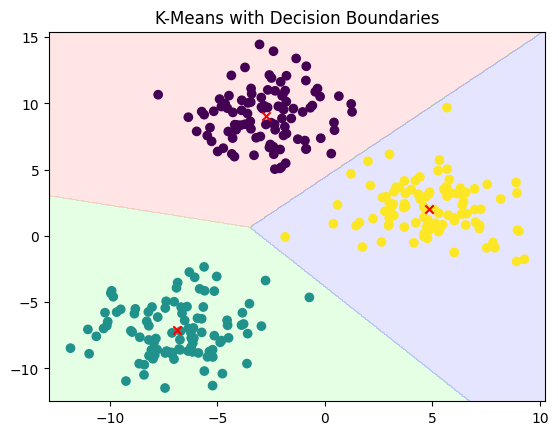

In [10]:
#31. Generate overlapping clusters using make_blobs, then apply K-Means and visualize decision boundaries.
from matplotlib.colors import ListedColormap

X, y = make_blobs(n_samples=300, centers=3, cluster_std=2.0, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
labels = kmeans.labels_

# Plot decision boundaries
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(["#FFAAAA","#AAFFAA","#AAAAFF"]))
plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="red", marker="x")
plt.title("K-Means with Decision Boundaries")
plt.show()


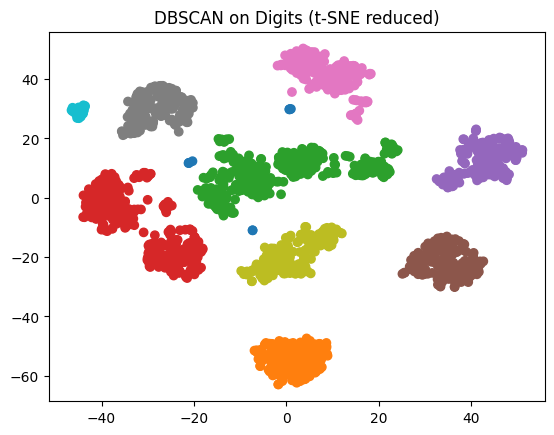

In [12]:
#32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize results.
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load Digits dataset
digits = load_digits()

# Reduce to 2D using t-SNE
X = TSNE(n_components=2, random_state=42).fit_transform(digits.data)

# Apply DBSCAN
db = DBSCAN(eps=5, min_samples=5).fit(X)
labels = db.labels_

# Plot results
plt.scatter(X[:,0], X[:,1], c=labels, cmap="tab10")
plt.title("DBSCAN on Digits (t-SNE reduced)")
plt.show()



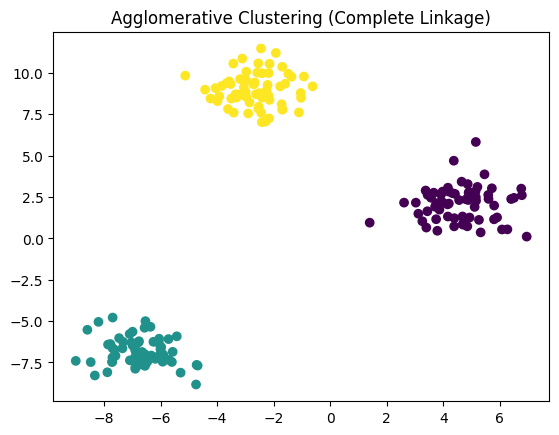

In [13]:
#33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage.
X, y = make_blobs(n_samples=200, centers=3, random_state=42)

agg = AgglomerativeClustering(n_clusters=3, linkage="complete").fit(X)
labels = agg.labels_

plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis")
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()


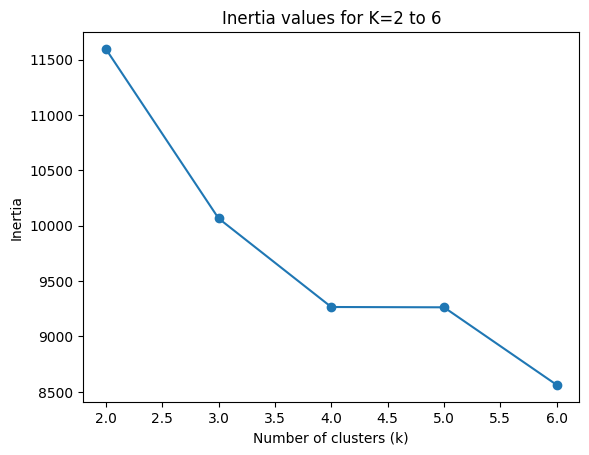

In [14]:
#34. Load Breast Cancer dataset and compare inertia values for K=2 to 6. Show results in line plot.
data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)

inertias = []
K = range(2, 7)
for k in K:
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(km.inertia_)

plt.plot(K, inertias, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Inertia values for K=2 to 6")
plt.show()


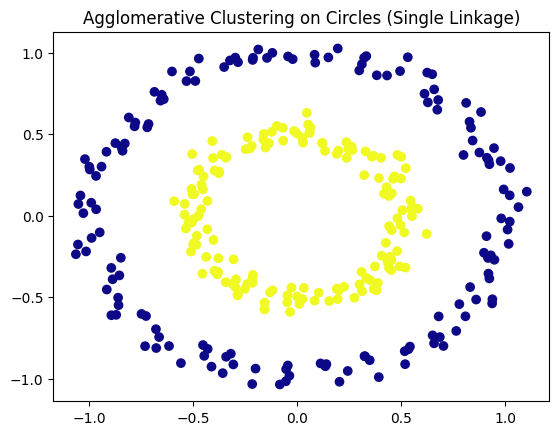

In [15]:
#35. Generate synthetic concentric circles and cluster using Agglomerative Clustering with single linkage.
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)

agg = AgglomerativeClustering(n_clusters=2, linkage="single").fit(X)
labels = agg.labels_

plt.scatter(X[:,0], X[:,1], c=labels, cmap="plasma")
plt.title("Agglomerative Clustering on Circles (Single Linkage)")
plt.show()


In [16]:
#36. Use the Wine dataset, apply DBSCAN after scaling, and count clusters (excluding noise).
X = StandardScaler().fit_transform(wine.data)

db = DBSCAN(eps=1.5, min_samples=5).fit(X)
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)


Number of clusters (excluding noise): 0


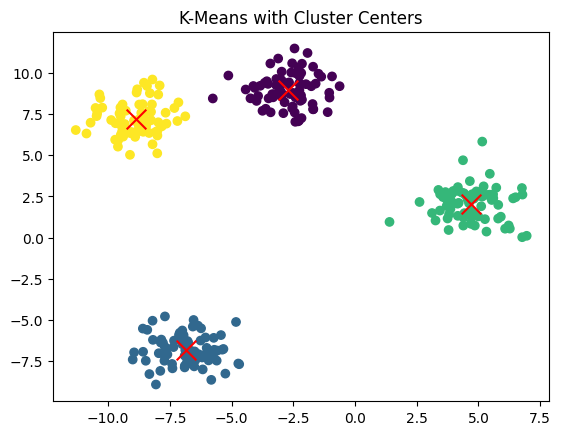

In [17]:
#37. Generate synthetic data with make_blobs and apply K-Means. Plot cluster centers on data.
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
labels = kmeans.labels_

plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="red", marker="x", s=200)
plt.title("K-Means with Cluster Centers")
plt.show()


In [18]:
#38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were noise.
X = StandardScaler().fit_transform(iris.data)

db = DBSCAN(eps=0.8, min_samples=5).fit(X)
labels = db.labels_

n_noise = list(labels).count(-1)
print("Number of noise samples:", n_noise)


Number of noise samples: 4


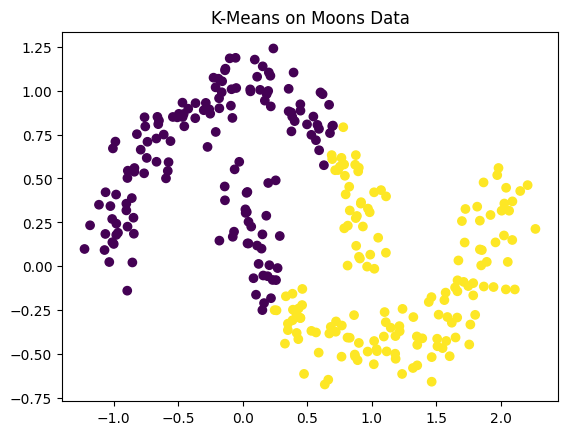

In [19]:
#39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize clustering.
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
labels = kmeans.labels_

plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis")
plt.title("K-Means on Moons Data")
plt.show()


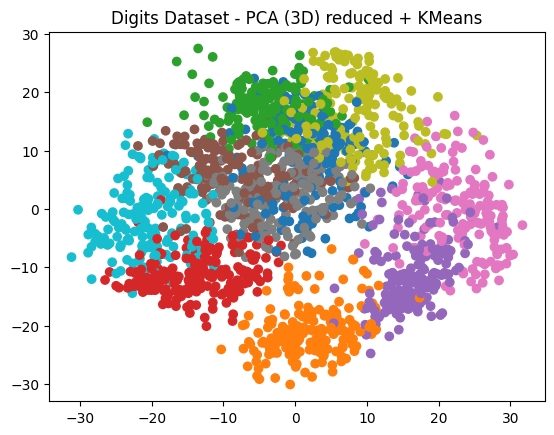

In [22]:
#40. Load Digits dataset, apply PCA to reduce to 3 components, then use K-Means and visualize 3D scatter plot.
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load dataset
digits = load_digits()
X = PCA(n_components=3, random_state=42).fit_transform(digits.data)

# KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42).fit(X)
labels = kmeans.labels_

# Plot result
plt.scatter(X[:,0], X[:,1], c=labels, cmap="tab10")
plt.title("Digits Dataset - PCA (3D) reduced + KMeans")
plt.show()



Silhouette Score: 0.6771943882143446


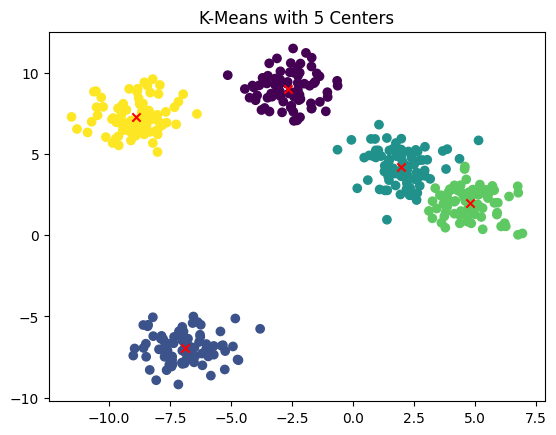

In [21]:
#41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score.
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=400, centers=5, random_state=42)

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)

score = silhouette_score(X, labels)
print("Silhouette Score:", score)

plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="red", marker="x")
plt.title("K-Means with 5 Centers")
plt.show()


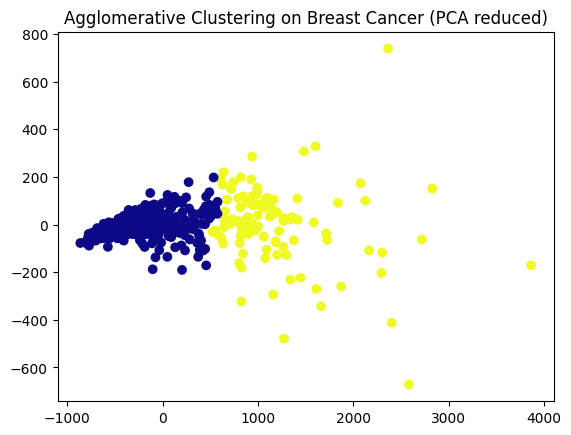

In [23]:
#42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

data = load_breast_cancer()
X = data.data

# PCA to 2D
X_pca = PCA(n_components=2, random_state=42).fit_transform(X)

# Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=2)
labels = agg.fit_predict(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="plasma")
plt.title("Agglomerative Clustering on Breast Cancer (PCA reduced)")
plt.show()


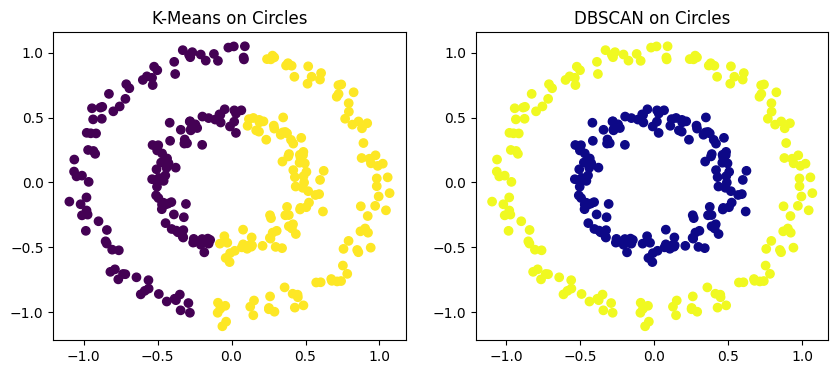

In [24]:
#43. Generate noisy circular data using make_circles and visualize clustering from KMeans & DBSCAN side-by-side.
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

X, y = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
labels_km = kmeans.labels_

# DBSCAN
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels_db = db.labels_

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=labels_km, cmap="viridis")
plt.title("K-Means on Circles")

plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=labels_db, cmap="plasma")
plt.title("DBSCAN on Circles")

plt.show()


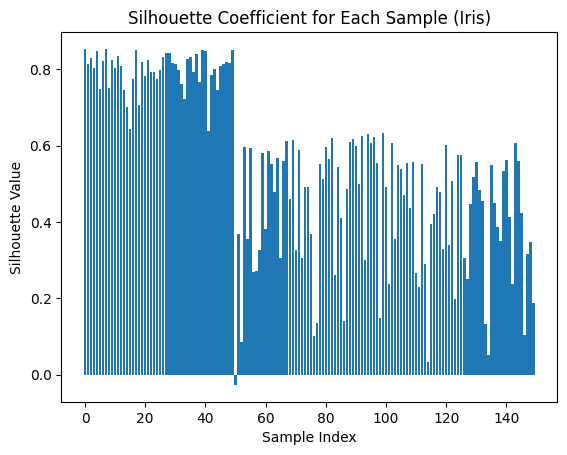

In [25]:
#44. Load the Iris dataset and plot Silhouette Coefficient for each sample after KMeans.from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_samples
import numpy as np

iris = load_iris()
X = iris.data

kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
labels = kmeans.labels_

sil_samples = silhouette_samples(X, labels)

plt.bar(range(len(sil_samples)), sil_samples)
plt.title("Silhouette Coefficient for Each Sample (Iris)")
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Value")
plt.show()


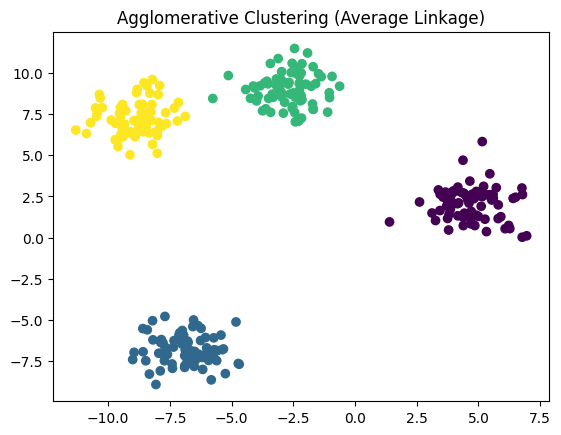

In [26]:
#45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with ‘average’ linkage.
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

agg = AgglomerativeClustering(n_clusters=4, linkage="average").fit(X)
labels = agg.labels_

plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis")
plt.title("Agglomerative Clustering (Average Linkage)")
plt.show()


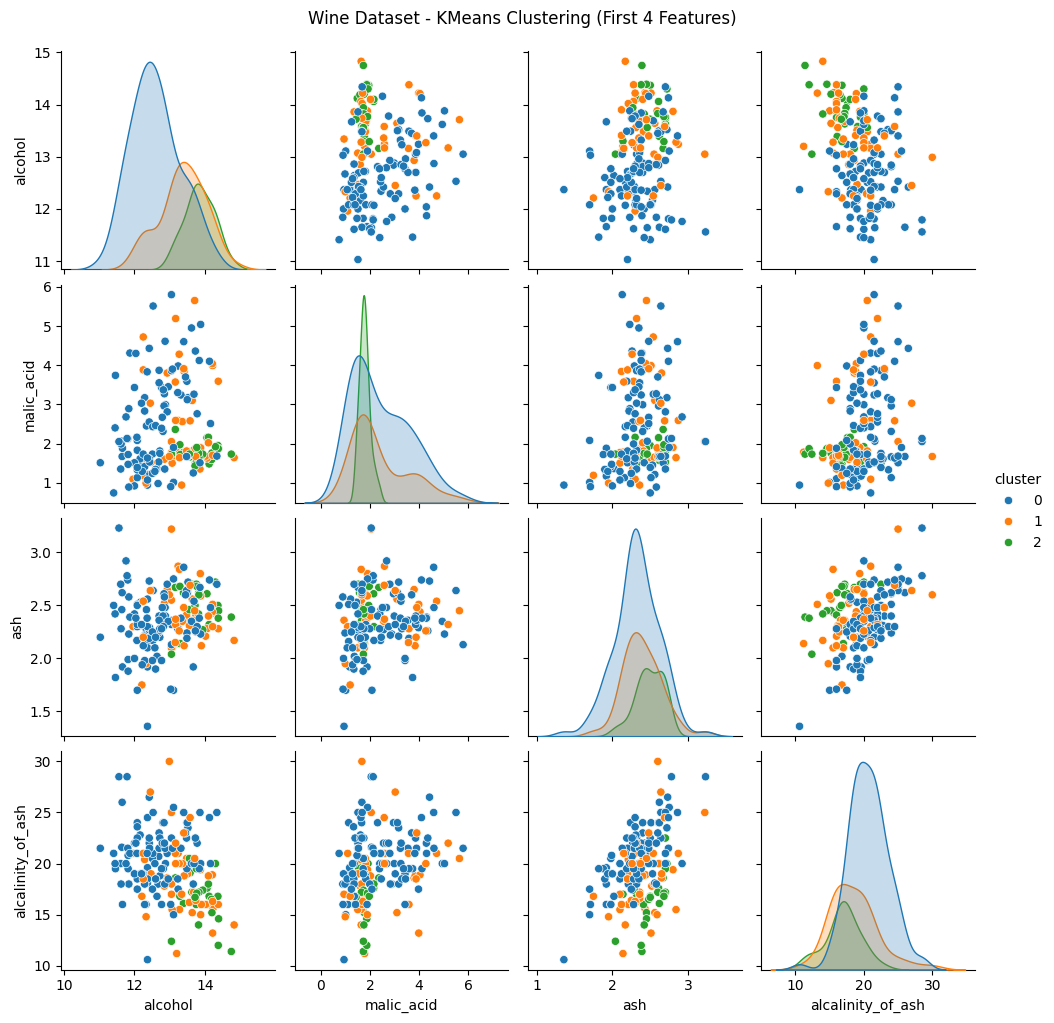

In [28]:
#46. Load the Wine dataset, apply KMeans, and visualize cluster assignments in seaborn pairplot.
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
X["cluster"] = kmeans.labels_   # Add cluster labels as a new column

# Visualize pairplot (first 4 features + cluster column)
sns.pairplot(X.iloc[:, :4].join(X["cluster"]), hue="cluster", palette="tab10")
plt.suptitle("Wine Dataset - KMeans Clustering (First 4 Features)", y=1.02)
plt.show()



In [29]:
#47. Generate noisy blobs using make_blobs and use DBSCAN to identify clusters and noise. Print count.
X, y = make_blobs(n_samples=300, centers=3, cluster_std=2.0, random_state=42)

db = DBSCAN(eps=1.5, min_samples=5).fit(X)
labels = db.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Number of clusters:", n_clusters)
print("Number of noise points:", n_noise)


Number of clusters: 3
Number of noise points: 14


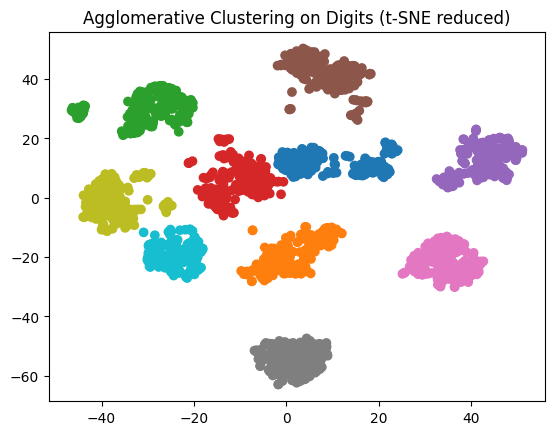

In [30]:
#48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot clusters.
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

digits = load_digits()
X = digits.data

# t-SNE reduction
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

# Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=10).fit(X_tsne)
labels = agg.labels_

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels, cmap="tab10")
plt.title("Agglomerative Clustering on Digits (t-SNE reduced)")
plt.show()
